In [140]:

def curve(filename):
    name=[]
    dis=[]
    pairs=[]
    cnt=0
    with open(filename) as f:
        lines = f.readlines()
        for l in lines:
            s = l.split()
            name.append(s[0])
            dis.append([float(x) for x in s[1:]])
            i=len(dis)-1
            for j in range(len(dis[i])):
                if i<j:
                    pairs.append((dis[i][j],i,j))
    pairs.sort()
    
    def same(i,j):
        return name[i][:5] == name[j][:5]

    atFAR=[0,10**(-7),10**(-6),10**(-5)]
    FRR=[1,1,1,1]
    
    atFRR=[0,0.01,0.015,0.02]
    FAR=[1,1,1,1]
    para=[1,1,1,1]
    cnt = 0 
    tp,fp=0,0
    tn,fn=0,0
    for v,i,j in pairs:
        if same(i,j):
            fn+=1
        else:
            tn+=1

    arr_x=[]
    arr_y=[]
    for v,i,j in pairs:
        if same(i,j):
            tp+=1
            fn-=1
        else:
            fp+=1
            tn-=1
        cnt+=1
        #print(fp/cnt,tp/p)
        far = fp/(fp+tn)
        frr = fn/(fn+tp)

        arr_x.append(frr)
        arr_y.append(far)
        #print(frr,far,v)
        for i in range(len(atFAR)):
            if atFAR[i]>=far:
                if frr<FRR[i]:
                    FRR[i]=frr
                    para[i]=v
        for i in range(len(atFRR)):
            if atFRR[i]>=frr:
                if FAR[i]==1:
                    FAR[i]=far
                    #para[i]=v
    print(FRR)
    print(para)
    mn=1
    ans=(0,0)
    for i in range(len(arr_x)):
        if abs(arr_x[i]-arr_y[i])<mn:
            mn=abs(arr_x[i]-arr_y[i])
            ans=(arr_x[i],arr_y[i])
    print(mn,ans)

In [141]:
curve('di_insight_sort_linf_feret')
curve('di_insight_sort_e8_feret')
curve('di_insight_sort_le_feret')
curve('di_insight_sort_l2_feret')

[0.0855690482914431, 0.0855690482914431, 0.020615645297938436, 0.0005648121999435188]
[0.102858, 0.102858, 0.117116, 0.136091]
6.656398149167131e-08 (0.0005648121999435188, 0.0005647456359620271)
[0.0005648121999435188, 0.0005648121999435188, 0.0005648121999435188, 0.0002824060999717594]
[0.0580299, 0.0580299, 0.0580299, 0.0606108]
3.434451145624883e-05 (0.0, 3.434451145624883e-05)
[0.0, 0.0, 0.0, 0.0]
[0.073644, 0.073644, 0.073644, 0.073644]
0.0 (0.0, 0.0)
[0.024569330697543065, 0.024569330697543065, 0.0031064670996893535, 0.0]
[0.763572, 0.763572, 0.849296, 0.931558]
1.1078874663306074e-06 (0.0, 1.1078874663306074e-06)


In [109]:
import numpy
import scipy
import scipy.stats
import scipy.optimize
import random
import matplotlib
import matplotlib.pyplot as plt
import math



def fit(x,y,t0,flag=False):
    
    def f(x,a,b,c,d):
        return scipy.stats.johnsonsu.cdf(x,a,b,c,d)  

    para,_=scipy.optimize.curve_fit(f,x,y,maxfev=50000)
    rv=scipy.stats.johnsonsu(para[0],para[1],para[2],para[3])
    y2=numpy.array(list(map(rv.cdf,x)))
    if flag:
        plt.plot(x,y)
        plt.plot(x,y2)
        plt.show() 
    if rv.cdf(t0)<=0:
        return 999
    return -math.log2(rv.cdf(t0))

0.20058727264404297 20
0.19004535675048828 30
0.18323326110839844 40
0.16993999481201172 80
0.16453266143798828 120


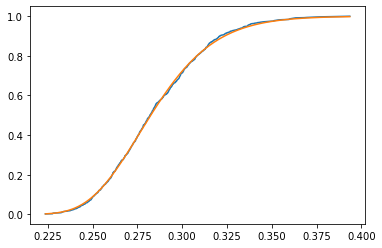

0.039165496826171875 20
0.026403427124023438 30
0.008515357971191406 40
0 80
0 120


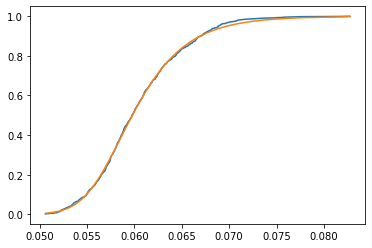

0.06371688842773438 20
0.06244087219238281 30
0.061664581298828125 40
0.06029701232910156 80
0.059818267822265625 120


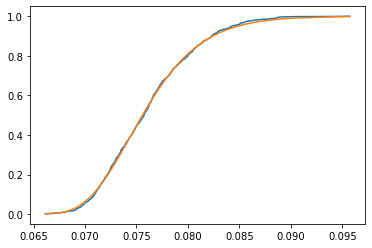

In [112]:
def estimate(filename):
    arr_x=[]
    arr_y=[]
    with open(filename) as file:
        for l in file.readlines():
            x,y=[float(t) for t in l.strip().split()]
            arr_x.append(x)
            arr_y.append(y)
    for target in [20,30,40,80,120]:
        l=0
        r=1
        while r-l>1e-6:
            mid=(l+r)/2
            ans=fit(arr_x,arr_y,mid)
            if ans > target:
                l=mid
            else:
                r=mid
        print(l,target)
    fit(arr_x,arr_y,0,True)
estimate('prob_linf')
estimate('prob_e8')
estimate('prob_le')

In [111]:
def FRRat(filename,t0):
    name=[]
    dis=[]
    pairs=[]
    cnt=0
    with open(filename) as f:
        lines = f.readlines()
        for l in lines:
            s = l.split()
            name.append(s[0])
            dis.append([float(x) for x in s[1:]])
            i=len(dis)-1
            for j in range(len(dis[i])):
                if i<j:
                    pairs.append((dis[i][j],i,j))
    pairs.sort()
    
    def same(i,j):
        return name[i][:5] == name[j][:5]

    cnt = 0 
    tp,fp=0,0
    tn,fn=0,0
    for v,i,j in pairs:
        if same(i,j):
            cnt+=1
            if v>t0:
                fn+=1
    print(fn/cnt)

In [126]:
 
FRRat('di_insight_sort_linf_feret',0.20058727264404297/2) 
FRRat('di_insight_sort_e8_feret',0.039165496826171875) 
FRRat('di_insight_sort_le_feret',0.059818267822265625) 
 

0.10787913018921208
0.18384637108161536
0.017791584298220843
